In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier




In [16]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.drop(columns=['Name','Ticket','Cabin'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis (EDA)

In [1]:
from IPython.display import Image
Image(filename='GAMBAR MATERI/2-17/2-17_1.PNG')

FileNotFoundError: [Errno 2] No such file or directory: 'GAMBAR MATERI/2-17/2-17_1.PNG'

EDA dasar:
- Target
- Numeric vs Target
- categoric[ordinal] vs Target


- - - biasanya numeric vs target memakai histogram
- - - biasanya categoric[ordinal] vs target memakai count

### Target


In [18]:
df.Survived.value_counts() # ini untuk melihat mana yang survive dan tidak 
                           # 0 = tidak survive dan 1 = survive

0    549
1    342
Name: Survived, dtype: int64

### Numeric vs Target

- Untuk numeric vs target biasanya melakukan plot histogram
- Karena data numeric itu Age dan Fare kita akan analisis Age vs Target dan Fare vs Target
- Age = umur
- Fare = Harga

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11316\1840535062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color='r', label='not survive')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11316\1840535062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

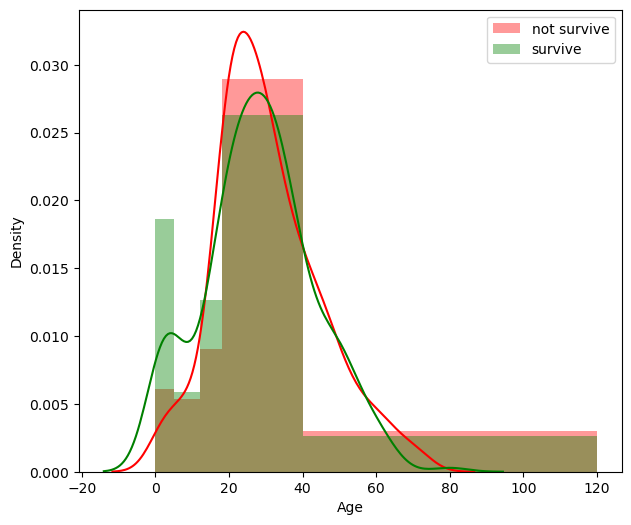

In [19]:
plt.figure(figsize=(7, 6)) # untuk megatur size 
sns.distplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color='r', label='not survive')
sns.distplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color='g', label='survive')
plt.legend(); # Untuk menampilkan label

# sns.displot itu untuk membuat histogram 
# sns.distplot(df.Age[df.Survived == 0] bisa dibaca begini:
# --> kita akan membuat histogram dimana yang survived itu umurnya seperti apa
# sns.distplot(df.Age[df.Survived == 1] bisa dibaca begini:
# --> kita akan membuat histogram dimana yang tidak survived itu umurnya seperti apa
# jika dilihat dari histogram di bawah anak balita cenderung survived dibanding dewasa survivednya cenderung sedikit

In [ ]:
plt.figure(figsize=(7, 6))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color='r', label='not survive')
sns.distplot(df.Fare[df.Survived == 1], bins=25, color='g', label='survive')
plt.legend();

# jika dilihat dari histogram dibawah orang yang bayarnya murah cenderung tidak selamat
# jika dilihat dari histogram dibawah orang yang bayarnya dibawah $25 cenderung ga selamat
# dan bayaran lebih mahal maka ada peluang selamat lebih tinggi

### Categoric / Ordinal vs Target  

In [20]:
from IPython.display import Image
Image(filename='GAMBAR MATERI/2-17/2-17_2.PNG')

FileNotFoundError: [Errno 2] No such file or directory: 'GAMBAR MATERI/2-17/2-17_2.PNG'

axes.flatten() itu berarti jadi disetiap kotak itu otomatis looping berurutan menjadi 0,1,2,3,4,5 

Pclass Axes(0.125,0.53;0.227941x0.35)
Sex Axes(0.398529,0.53;0.227941x0.35)
Parch Axes(0.672059,0.53;0.227941x0.35)
SibSp Axes(0.125,0.11;0.227941x0.35)
Embarked Axes(0.398529,0.11;0.227941x0.35)


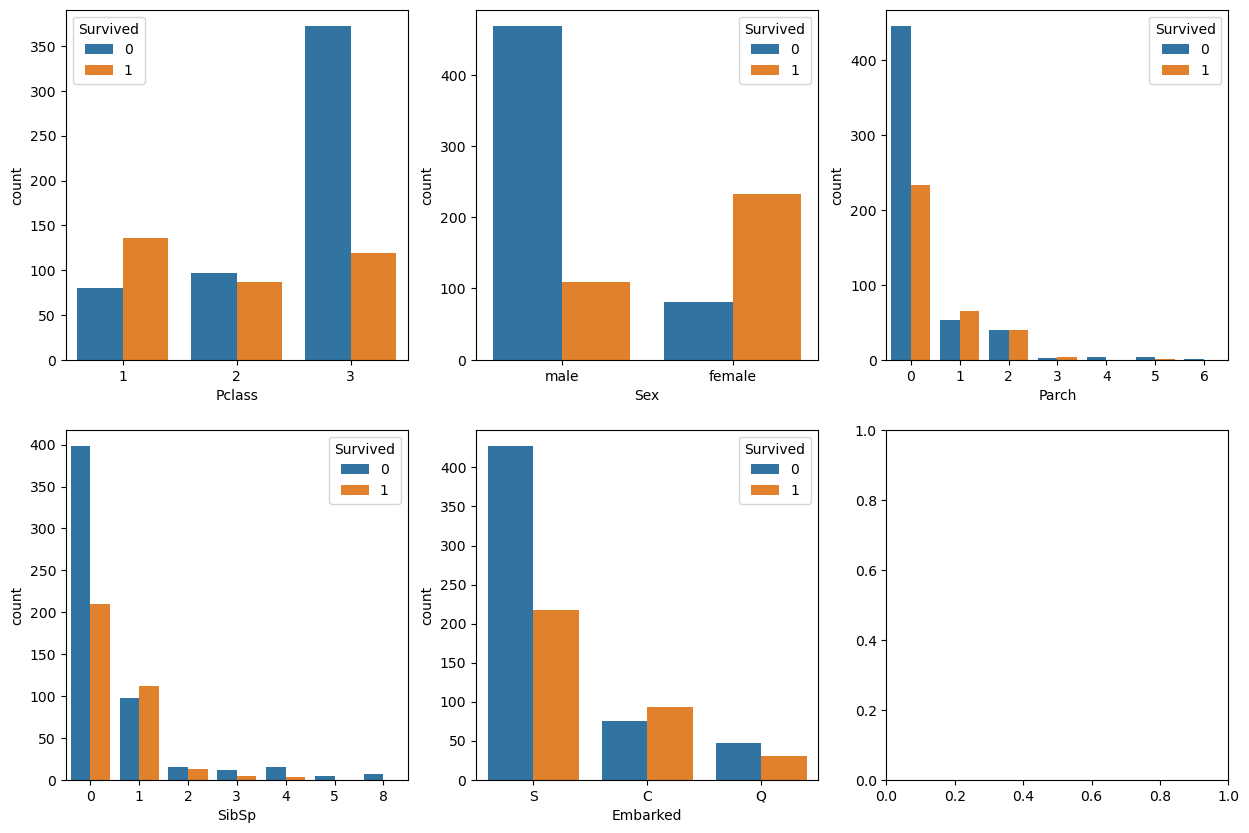

In [21]:
cat_var = ['Pclass', 'Sex', 'Parch', 'SibSp', 'Embarked']

fig, axes = plt.subplots(2, 3, figsize=(15,10)) # plt.subplots(baris, column)
                                                # fig, axes berarti keluarannya berupa figure dan axes
                                                # fig, axes itu dibutuhkan unutk menggunakan sintaks axes,flatten()
                                                # jika salah satu dihapus maka akan error
for cat, ax in  zip(cat_var, axes.flatten()): # axes.flatten() itu berarti jadi disetiap kotak itu 0,1,2,3,4,5
    print(cat, ax) # untuk cara membaca looping di atas
                                            # --> jadi jika dibaca sesuai looping di atas, - Pclass itu berada di kotak ke-0
                                            # - Sex itu berada i kotak ke-1
                                            # - Parch itu berada di kotak ke-2
                                            # - SibSp itu berada di kotak ke-3
                                            # - Embarked itu berada di kotak ke-4
    sns.countplot(data=df,x=cat,  hue='Survived', ax=ax) # ax=ax berarti axes yang dipake = ax

    
# zip(cat_var, axes.flatten) berarti mencocokan dari data list di cat_var ke axes.flatten()
# Illustrasi zip fungctioon check this:

#names = ('Navin','Kiran','Harsh','Navin')
#comps = ('Dell','Apple','MS','Dell')

#zipped = zip(names,comps)
#print(f'Data zipped : {zipped} ')

#for (a,b) in zipped:
 #   print(a,b)

### Pandas Crosstab (Optional)

Ini tips tambahan jika tidak ingin melakuka plotting seperti di atas

In [ ]:
pd.crosstab(df.Pclass, df.Survived, normalize='index') # normalize ='index' berarti di index perbaris ditotalin 100%
                                                       # kalo kelas 1 / kelas mahal cenderung selamat
                                                       # kalo kelas 2 sedang imbang survivednya
                                                       # kalo kelas 3 / kelas murah tidak survived

# Feature Engineering

### Adding feature => isAlone

In [22]:
df.SibSp == 0

PassengerId
1      False
2      False
3       True
4      False
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: SibSp, Length: 891, dtype: bool

In [23]:
df['isAlone'] = (df.SibSp == 0) & (df.Parch == 0) # jadi ini artinya yaitu yang benar" alone itu kita buat yang tidak ada saudara/pendamping hidup & tidak bareng orang tua dan aanak" 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


## Binning

- binning berarti mengubah numeric menjadi categoric
- binning memakai pd.cut

In [24]:
df.Age = pd.cut(df.Age, [0, 5, 12, 18, 40, 120], labels=['balita', 'anak-anak','remaja', 'dewasa', 'lansia'])
df.head() # Mengubah data numeric di Age/umur menjadi categoric

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


## Fare

In [25]:
df.Fare = pd.cut(df.Fare, [0, 25, 100, 600], labels=['murah', 'mahal','eksekutif'])
df.head() # Mengubah data numeric di Harga/Fare menjadi categoric

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True


# Dataset Splitting

In [26]:
# Dataset Splitting
X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 



((712, 8), (179, 8), (712,), (179,))

# Preprocessor

In [27]:
from jcopml.pipeline import num_pipe, cat_pipe

In [ ]:
X_train.columns

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ['SibSp', 'Parch']),  # pakai tools dari jcopml
                                                                  # bisa lihat di shift  + tab otomatis impute dimasukan median 
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass', 'Sex', 'Fare','Embarked', 'isAlone']) 
])



# Training

In [3]:
from jcopml.tuning import grid_search_params as gsp

In [4]:
gsp.knn_params

{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Import data dan drop kolom
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.drop(columns=['Name','Ticket','Age','Cabin'], inplace=True)

# Dataset Splitting
X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

# Preprocessor
numerical_pipeline = Pipeline([                      
    ('imputer', SimpleImputer(strategy='mean')),    
    ('scaler', MinMaxScaler())                      
])                                                   

categorical_pipeline = Pipeline([                          
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder())                            
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['SibSp', 'Parch', 'Fare']), 
    ('categoric', categorical_pipeline, ['Pclass', 'Sex', 'Embarked']) 
])

# Pipeline
pipeline = Pipeline([          
    ('prep', preprocessor),    
    ('algo', KNeighborsClassifier())
])

# Parameter Tuning
parameter = {                                     
                                                  
                                                  
    'algo__n_neighbors': range(1,51,2),         
    'algo__weights': ['uniform','distance'],      
    'algo__p': [1,2]                             
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1) 
model.fit(X_train, y_train)    

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
# model.score(train), model.score(validation), model.score(test)
                                                                    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'algo__n_neighbors': 21, 'algo__p': 1, 'algo__weights': 'uniform'}
0.8174157303370787 0.8146060111808436 0.7821229050279329


In [ ]:
pipeline = Pipeline([          
    ('prep', preprocessor),    
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1) 
model.fit(X_train, y_train)    
# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
# model.score(train), model.score(validation), model.score(test)
                                                                    